In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 119.1 kB/s eta 0:05:25
   ---------------------------------------- 0.0/38.6 MB 115.9 kB/s eta 0:05:33
   ---------------------------------------- 0.0/38.6 MB 115.9 kB/s eta 0:05:33
   ---------------------------------------- 0.1/38.6 MB 156.1 kB/s eta 0:04:08
   ----------------------------------------

In [3]:
# import library
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

# Membaca data gambar

In [23]:
img = cv2.imread("fotorafi.jpeg")

In [26]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

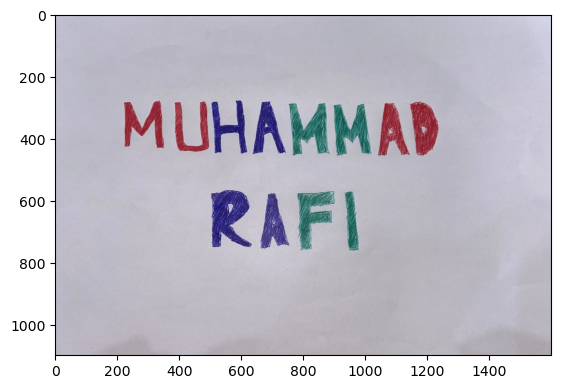

In [27]:
plt.imshow(rgb)

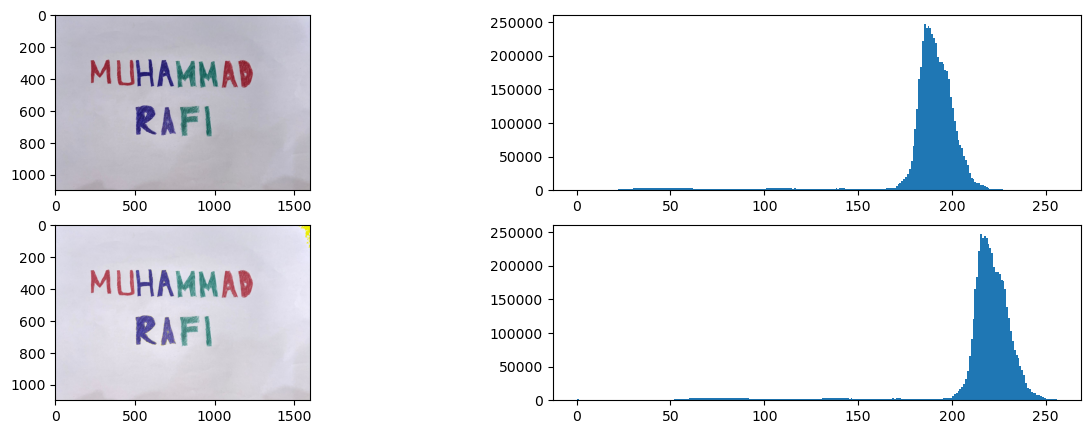

In [36]:
(baris, kolom)= rgb.shape[:2]

beta = 30 #bias untuk kecerahan
citra_cerah = np.zeros((baris, kolom, 3)) #np zeros = mengubah semua elemen array menjadi 0
 
for x in range(baris) :
    for y in range(kolom) :
        gyx = rgb[x,y] + beta
        citra_cerah[x,y] = gyx
citra_cerah = citra_cerah.astype(np.uint8)
 
fig, axs = plt.subplots(2,2, figsize=(15,5))
axs[0,0].imshow(rgb)
axs[0,1].hist(img.ravel(),256,[0,256])
axs[1,0].imshow(citra_cerah)
axs[1,1].hist(citra_cerah.ravel(),256,[0,256])
plt.show()

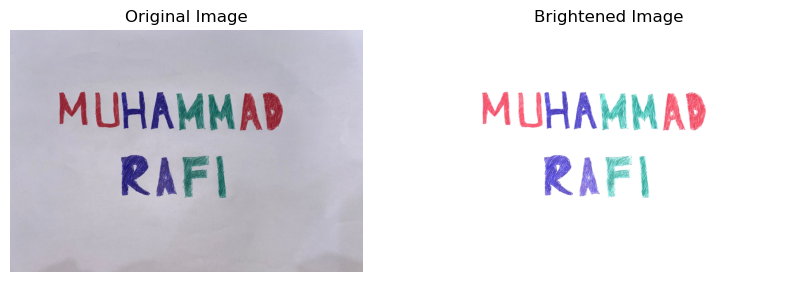

In [28]:
# 2. Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Adjust Contrast and Brightness
alpha = 1.5  # kontras
beta = 30    # kecerahan
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# 4. Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

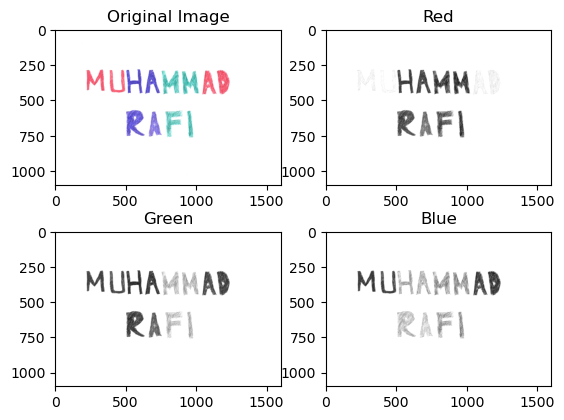

In [33]:
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the red channel
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,0], cmap="gray")
plt.title('Red')

# Display the green channel
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,1], cmap="gray")
plt.title('Green')

# Display the blue channel
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)[:,:,2], cmap="gray")
plt.title('Blue')

plt.show()

# Histogram

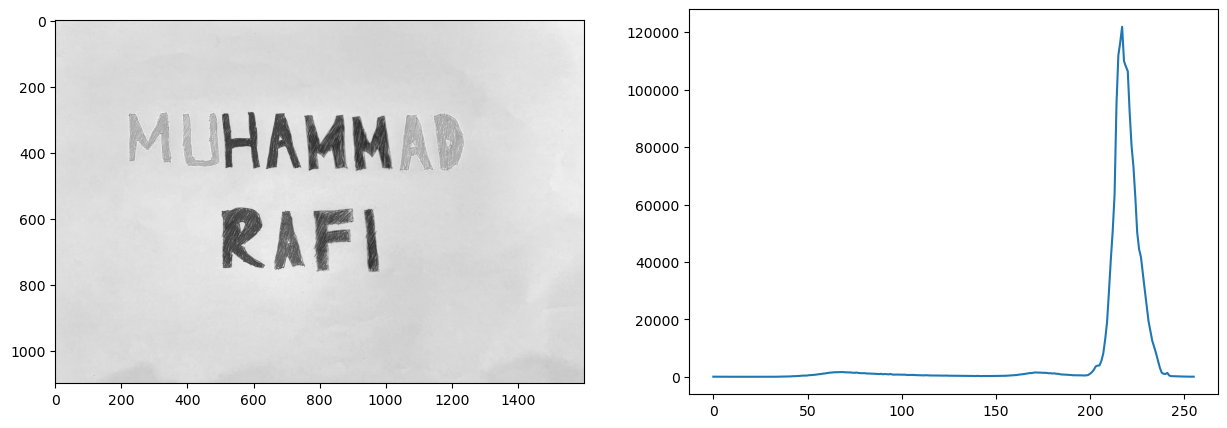

In [37]:
merah=citra_cerah[:,:,0] #Merah
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([merah],[0],None,[256],[0,256])
axs[0].imshow(merah, cmap='gray')
axs[1].plot(hist)
plt.show()

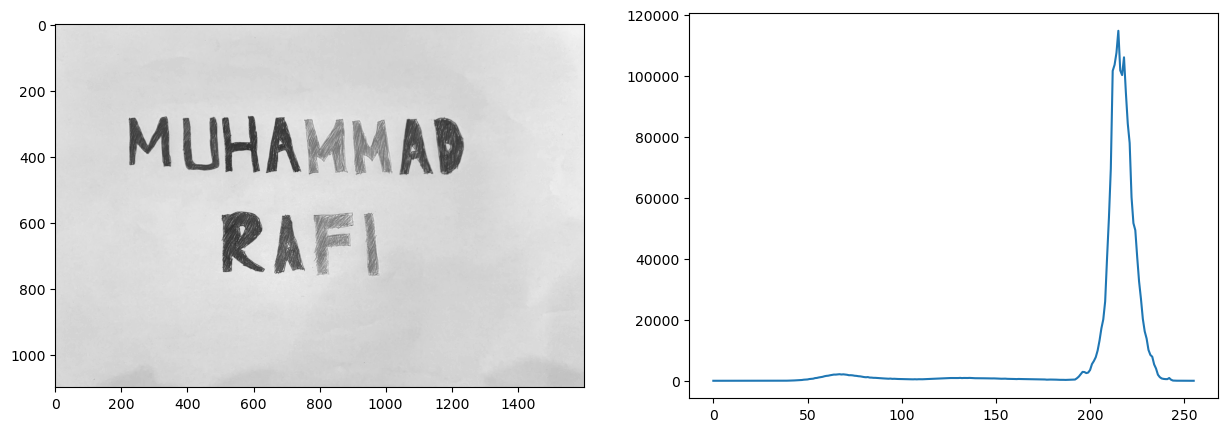

In [38]:
hijau=citra_cerah[:,:,1] #hijau
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([hijau],[0],None,[256],[0,256])
axs[0].imshow(hijau, cmap='gray')
axs[1].plot(hist)
plt.show()

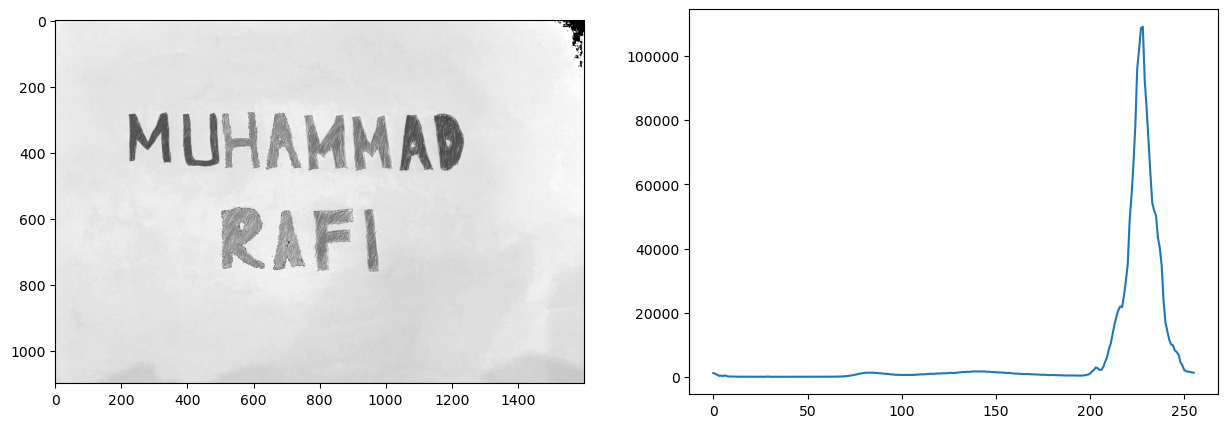

In [39]:
biru=citra_cerah[:,:,2] #biru
fig, axs = plt.subplots(1,2, figsize = (15,5))
hist = cv2.calcHist([biru],[0],None,[256],[0,256])
axs[0].imshow(biru, cmap='gray')
axs[1].plot(hist)
plt.show()

# Membaca Gambar

In [40]:
color_image = cv2.imread('fotorafi.jpeg')

# Konversi citra ke dalam ruang warna HSV

In [41]:
hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

# Definisikan rentang warna untuk setiap warna

In [42]:
lower_blue = np.array([90, 100, 100])
upper_blue = np.array([130, 255, 255])

lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Deteksi warna biru

In [43]:
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Deteksi warna hijau

In [44]:
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Deteksi warna merah

In [45]:
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

# Gabungkan masker untuk warna merah dan biru

In [46]:
mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)

# Gabungkan masker untuk warna merah, biru, dan hijau

In [47]:
mask_red_blue_green = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_blue), mask_green)

# Plot hasil

Text(0.5, 1.0, 'RED-GREEN-BLUE')

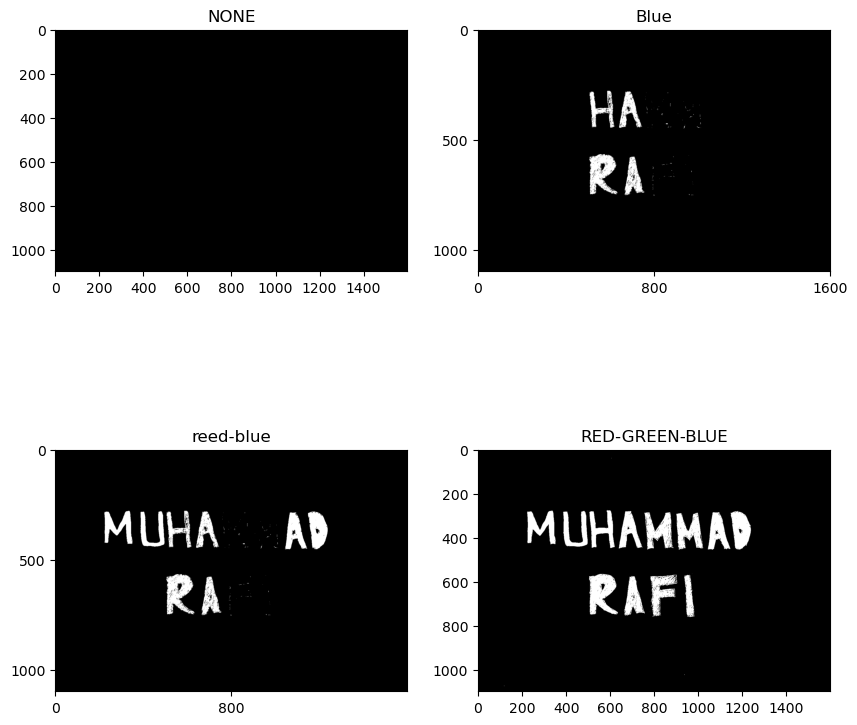

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('reed-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

(thresh, binary4) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'binary')
axs[1,1].set_title('RED-GREEN-BLUE')